In [2]:
import numpy  as np
import pandas as pd

print('numpy  version - ' , np.__version__) 
print('pandas version - ' , pd.__version__) 

from   io import StringIO
import missingno as msno
# ml
import sklearn
from   sklearn.datasets import load_iris, load_breast_cancer

print('sklearn version - ' , sklearn.__version__)

from sklearn.model_selection import train_test_split, KFold , StratifiedKFold , cross_val_score, cross_validate, GridSearchCV 
from sklearn.tree            import DecisionTreeClassifier
from sklearn.ensemble        import RandomForestClassifier         
from sklearn.linear_model    import LogisticRegression , LinearRegression


from sklearn.metrics         import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, make_scorer , precision_recall_curve 
from sklearn.impute          import SimpleImputer

from sklearn.preprocessing   import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from IPython.display import Image

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# unsupervised learning
from sklearn.cluster import KMeans

numpy  version -  1.20.3
pandas version -  1.3.4
sklearn version -  0.24.2


#### cluster(군집화)
- 데이터 포인트들을 별개의 군집으로 그룹화하는 것을 의미함.
- 유사성이 높은 데이터들을 동일한 그룹으로 분류하고 서로 다른 군집들이 상이성을 가지도록 하는 알고리즘

In [4]:
cluster_frm = pd.DataFrame(columns=('x','y'))
cluster_frm.loc[0] = [7,1]
cluster_frm.loc[1] = [2,1]
cluster_frm.loc[2] = [4,2]
cluster_frm.loc[3] = [9,4]
cluster_frm.loc[4] = [10,5]
cluster_frm.loc[5] = [10,6]
cluster_frm.loc[6] = [11,5]
cluster_frm.loc[7] = [11,6]
cluster_frm.loc[8] = [15,3]
cluster_frm.loc[9] = [15,2]
cluster_frm.loc[10] = [16,6]
cluster_frm.loc[11] = [16,1]
cluster_frm

,x,y
0,7,1
1,2,1
2,4,2
3,9,4
4,10,5
5,10,6
6,11,5
7,11,6
8,15,3
9,15,2


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


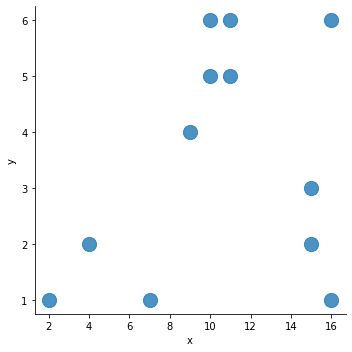

In [5]:
sns.lmplot( 'x' , 'y' , 
            data = cluster_frm,
            fit_reg = False ,
            scatter_kws = {'s' : 200})
plt.show()
plt.close()

In [7]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(cluster_frm)

KMeans(n_clusters=3)

In [10]:
print('type - ' , type(kmeans) )
print('type - ' , type(kmeans.labels_))

type -  <class 'sklearn.cluster._kmeans.KMeans'>
type -  <class 'numpy.ndarray'>


In [11]:
cluster_frm['cluster_id'] = kmeans.labels_
cluster_frm

,x,y,cluster_id
0,7,1,2
1,2,1,2
2,4,2,2
3,9,4,0
4,10,5,0
5,10,6,0
6,11,5,0
7,11,6,0
8,15,3,1
9,15,2,1


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


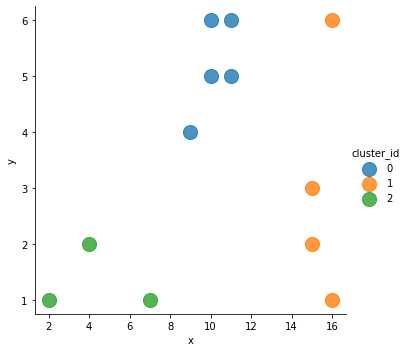

In [12]:
sns.lmplot( 'x' , 'y' , 
            data = cluster_frm,
            fit_reg = False ,
            scatter_kws = {'s' : 200},
            hue = 'cluster_id')
plt.show()
plt.close()

In [13]:
from sklearn.datasets import make_blobs
print('분류용 가상 데이터 생성 - ')

X, y = make_blobs(n_samples  = 300 , 
                  n_features = 2   , 
                  centers    = 3   ,
                  random_state = 100)

분류용 가상 데이터 생성 - 


In [14]:
X

array([[-1.04844640e+01, -7.96790222e+00],
       [-3.39076283e+00,  7.07786537e+00],
       [-1.03572951e+01, -8.70615998e+00],
       [-8.15044871e+00, -7.96418322e+00],
       [-9.03956370e+00, -6.77732260e+00],
       [-2.13452037e+00,  6.78552725e+00],
       [ 6.78603005e-01, -4.17761085e+00],
       [-9.89275599e+00, -8.91712947e+00],
       [-1.22046374e-01,  5.16013150e+00],
       [-1.08998240e+00, -4.56741361e+00],
       [ 1.21168542e+00,  4.92265860e+00],
       [ 2.51469464e-01, -3.66942865e+00],
       [-2.05814047e+00,  6.84288768e+00],
       [ 1.09049844e+00, -5.87582929e+00],
       [ 1.33439820e+00, -4.16262506e+00],
       [-8.07463680e-01,  5.61161784e+00],
       [ 1.10594346e+00, -4.41906375e+00],
       [ 9.37238113e-02,  7.90841888e+00],
       [ 9.76970826e-01, -4.40432866e+00],
       [-1.04164861e+01, -1.03206552e+01],
       [-9.88895050e+00, -8.20004984e+00],
       [ 5.41860777e-01, -4.37693628e+00],
       [ 1.54081964e+00, -4.53702344e+00],
       [ 1.

In [15]:
y

array([2, 1, 2, 2, 2, 1, 0, 2, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 2, 2, 0,
       0, 0, 2, 1, 1, 2, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 2, 1, 1, 0, 0,
       0, 0, 0, 2, 1, 0, 0, 1, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 1, 0, 0,
       1, 2, 1, 2, 1, 2, 0, 2, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 2, 1, 1, 2,
       1, 1, 0, 0, 2, 2, 2, 0, 1, 2, 0, 1, 2, 1, 0, 1, 0, 1, 2, 1, 2, 2,
       1, 2, 1, 0, 2, 2, 0, 2, 0, 0, 0, 0, 1, 0, 2, 0, 1, 2, 1, 1, 2, 1,
       0, 2, 0, 2, 0, 2, 0, 1, 1, 1, 1, 2, 1, 2, 2, 2, 0, 2, 1, 0, 0, 0,
       2, 0, 1, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 1, 2, 2, 0, 2, 2, 0, 1, 0,
       0, 2, 1, 0, 0, 1, 0, 2, 2, 2, 1, 2, 2, 2, 1, 0, 1, 1, 0, 1, 2, 0,
       0, 0, 0, 1, 0, 2, 0, 1, 1, 0, 1, 2, 2, 1, 0, 0, 0, 0, 2, 0, 2, 1,
       1, 2, 2, 1, 2, 1, 2, 2, 1, 1, 1, 2, 0, 0, 1, 1, 2, 2, 1, 0, 1, 2,
       0, 1, 0, 2, 1, 0, 2, 1, 0, 2, 0, 2, 0, 2, 2, 2, 0, 0, 1, 1, 2, 2,
       1, 0, 1, 1, 1, 0, 2, 0, 1, 1, 1, 1, 2, 0, 0, 0, 2, 2, 0, 0, 2, 0,
       1, 2, 1, 2, 1, 1, 2, 2, 2, 1, 1, 2, 1, 0])

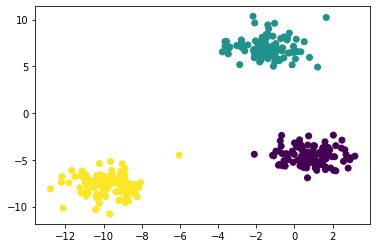

In [19]:
plt.scatter(X[ : , 0], X[ : , 1] , marker="o" , c=y)

plt.show()
plt.close()

In [20]:
feature , label = make_blobs(random_state = 100)

In [21]:
feature

array([[ 3.36818459e-01, -3.40287961e+00],
       [-9.48324266e+00, -8.66266052e+00],
       [-1.93336328e+00,  5.70953908e+00],
       [-1.00318241e+01, -5.57834393e+00],
       [ 5.41860777e-01, -4.37693628e+00],
       [-8.12962929e+00, -7.05554321e+00],
       [-7.30825786e-01,  7.32375552e+00],
       [-1.84142532e+00,  6.20630467e+00],
       [ 4.10071850e-01, -3.99744881e+00],
       [-8.73509589e+00, -5.49090535e+00],
       [ 1.84941962e+00, -3.91839346e+00],
       [-9.15256069e+00, -9.17805648e+00],
       [-3.21429939e+00,  5.75926164e+00],
       [ 2.84503785e-01, -3.61576523e+00],
       [-9.29074849e-01,  5.79099955e+00],
       [ 3.66925242e-01,  6.51861930e+00],
       [ 1.59909918e+00, -3.07105617e+00],
       [-9.71270568e+00, -7.91707651e+00],
       [-1.00804044e+01, -6.55135324e+00],
       [ 1.10594346e+00, -4.41906375e+00],
       [ 2.48708050e+00, -2.89100712e+00],
       [ 5.87148931e-03, -3.18314256e+00],
       [ 1.61854360e+00, -4.88855923e+00],
       [-9.

In [22]:
label

array([0, 2, 1, 2, 0, 2, 1, 1, 0, 2, 0, 2, 1, 0, 1, 1, 0, 2, 2, 0, 0, 0,
       0, 2, 1, 0, 2, 1, 0, 2, 0, 1, 0, 2, 2, 0, 0, 2, 1, 2, 1, 0, 2, 1,
       1, 2, 2, 1, 1, 1, 1, 0, 2, 2, 0, 0, 2, 0, 2, 0, 1, 0, 0, 0, 1, 0,
       1, 2, 2, 1, 0, 0, 2, 2, 1, 0, 2, 1, 1, 2, 2, 0, 1, 1, 0, 2, 1, 2,
       2, 1, 2, 1, 1, 2, 1, 1, 0, 0, 1, 0])

In [24]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(feature)

KMeans(n_clusters=3)

In [25]:
kmeans.labels_

array([0, 2, 1, 2, 0, 2, 1, 1, 0, 2, 0, 2, 1, 0, 1, 1, 0, 2, 2, 0, 0, 0,
       0, 2, 1, 0, 2, 1, 0, 2, 0, 1, 0, 2, 2, 0, 0, 2, 1, 2, 1, 0, 2, 1,
       1, 2, 2, 1, 1, 1, 1, 0, 2, 2, 0, 0, 2, 0, 2, 0, 1, 0, 0, 0, 1, 0,
       1, 2, 2, 1, 0, 0, 2, 2, 1, 0, 2, 1, 1, 2, 2, 0, 1, 1, 0, 2, 1, 2,
       2, 1, 2, 1, 1, 2, 1, 1, 0, 0, 1, 0])

In [26]:
kmeans.predict(feature)

array([0, 2, 1, 2, 0, 2, 1, 1, 0, 2, 0, 2, 1, 0, 1, 1, 0, 2, 2, 0, 0, 0,
       0, 2, 1, 0, 2, 1, 0, 2, 0, 1, 0, 2, 2, 0, 0, 2, 1, 2, 1, 0, 2, 1,
       1, 2, 2, 1, 1, 1, 1, 0, 2, 2, 0, 0, 2, 0, 2, 0, 1, 0, 0, 0, 1, 0,
       1, 2, 2, 1, 0, 0, 2, 2, 1, 0, 2, 1, 1, 2, 2, 0, 1, 1, 0, 2, 1, 2,
       2, 1, 2, 1, 1, 2, 1, 1, 0, 0, 1, 0])

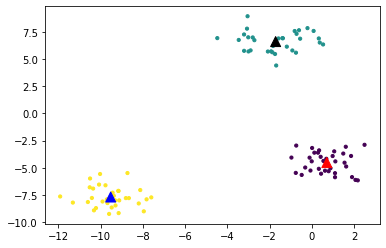

In [32]:
plt.scatter(feature[ : , 0] , feature[ : , 1],
            marker = 'o' , 
            c = kmeans.labels_ , 
            s = 10)

plt.scatter(kmeans.cluster_centers_[ : , 0] , kmeans.cluster_centers_[ : , 1],
            marker = '^' , 
            c = ['r', 'k' , 'b'] , 
            s = 100)

plt.show()
plt.close()

In [30]:
kmeans.cluster_centers_

array([[ 0.70353328, -4.52767455],
       [-1.72134158,  6.61045437],
       [-9.52981151, -7.69781936]])

- iris clustering

In [33]:
iris = load_iris()
iris_frm = pd.DataFrame(data    = iris.data , 
                        columns = iris.feature_names)
iris_frm

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [37]:
iris_kmeans = KMeans(n_clusters = 3 , 
                     verbose    = 1 , 
                     init       = 'k-means++' , 
                     max_iter   = 300 ) 
iris_kmeans.fit(iris_frm)

Initialization complete
Iteration 0, inertia 113.32
Iteration 1, inertia 79.19183885441781
Iteration 2, inertia 78.851441426146
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 105.83999999999999
Iteration 1, inertia 85.37089719658644
Iteration 2, inertia 79.86398439527464
Iteration 3, inertia 79.19714263977781
Iteration 4, inertia 78.851441426146
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 146.79999999999998
Iteration 1, inertia 84.60230806541558
Iteration 2, inertia 79.86398439527464
Iteration 3, inertia 79.19714263977781
Iteration 4, inertia 78.851441426146
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 115.02000000000001
Iteration 1, inertia 84.47219830938286
Iteration 2, inertia 83.77119920961835
Iteration 3, inertia 82.72701093072982
Iteration 4, inertia 81.54360278471792
Iteration 5, inertia 80.80637599999999
Iteration 6, inertia 79.87357983461304


KMeans(n_clusters=3, verbose=1)

In [38]:
iris_kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [39]:
iris_kmeans.cluster_centers_

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [40]:
iris_kmeans.predict(iris_frm)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [42]:
iris_frm['cid'] = iris_kmeans.labels_
iris_frm

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cid
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [43]:
iris_frm['target'] = iris.target
iris_frm

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cid,target
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2
146,6.3,2.5,5.0,1.9,1,2
147,6.5,3.0,5.2,2.0,2,2
148,6.2,3.4,5.4,2.3,2,2


In [48]:
print('cid를 기준으로 sepal length 의 빈도를 확인 한다면? -')
iris_frm.groupby(['cid' , 'target'])['sepal length (cm)'].count()

cid를 기준으로 sepal length 의 빈도를 확인 한다면? -


cid  target
0    0         50
1    1         48
     2         14
2    1          2
     2         36
Name: sepal length (cm), dtype: int64

#### 주성분분석(Principal Components Analysis)
- 고차원의 데잍터를 저차원의 데이터로 차원을 축소시키는 방법
- 이유 ? 모든 피처가 결과에 영향을 미치는건 아니기 때문에
- 시각화를 위해서는 2차원의 그래프
- 이점 ? 시각화 , 노이즈제거 , 메모리 절약, 모델의 성능을 개선

In [49]:
from sklearn.decomposition import PCA
iris_pca = PCA(n_components = 2) 

iris_pca_trans = iris_pca.fit_transform(iris.data)
iris_pca_trans 

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

In [50]:
iris_frm['pca_x'] = iris_pca_trans[ : , 0]
iris_frm['pca_y'] = iris_pca_trans[ : , 1]
iris_frm

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cid,target,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,0,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,0,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,0,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,0,0,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,0,0,-2.728717,0.326755
...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2,1.944110,0.187532
146,6.3,2.5,5.0,1.9,1,2,1.527167,-0.375317
147,6.5,3.0,5.2,2.0,2,2,1.764346,0.078859
148,6.2,3.4,5.4,2.3,2,2,1.900942,0.116628


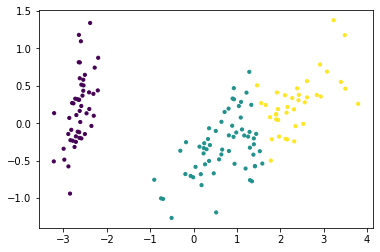

In [51]:
plt.scatter(iris_frm['pca_x'] , iris_frm['pca_y'],
            marker = 'o' , 
            c = iris_frm['cid'] , 
            s = 10)
plt.show()
plt.close()

In [52]:
print('차원축소시 피처의 유닛이 다를경우 - 스케일링이 필요하다')
print()

차원축소시 피처의 유닛이 다를경우 - 스케일링이 필요하다



In [56]:
def feature_scaling(method='None' , input_data = None) :
    if method == 'standard' :
        return StandardScaler().fit_transform(input_data)
    if method == 'minmax' :
        return MinMaxScaler().fit_transform(input_data)

In [57]:
std_scaler = feature_scaling(method='standard' , 
                input_data = iris_frm.iloc[ :  , : 4])
std_scaler

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [58]:
iris_pca = PCA(n_components = 2) 

iris_pca_trans = iris_pca.fit_transform(std_scaler)
iris_pca_trans 

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538],
       [-2.07563095,  1.48917752],
       [-2.44402884,  0.0476442 ],
       [-2.23284716,  0.22314807],
       [-2.33464048, -1.11532768],
       [-2.18432817, -0.46901356],
       [-2.1663101 ,  1.04369065],
       [-2.32613087,  0.13307834],
       [-2.2184509 , -0.72867617],
       [-2.6331007 , -0.96150673],
       [-2.1987406 ,  1.86005711],
       [-2.26221453,  2.68628449],
       [-2.2075877 ,  1.48360936],
       [-2.19034951,  0.48883832],
       [-1.898572  ,  1.40501879],
       [-2.34336905,  1.12784938],
       [-1.914323  ,  0.40885571],
       [-2.20701284,  0.92412143],
       [-2.7743447 ,  0.45834367],
       [-1.81866953,  0.08555853],
       [-2.22716331,  0.13725446],
       [-1.95184633, -0.62561859],
       [-2.05115137,  0.24216355],
       [-2.16857717,  0.52714953],
       [-2.13956345,

In [59]:
iris_frm['std_pca_x'] = iris_pca_trans[ : , 0]
iris_frm['std_pca_y'] = iris_pca_trans[ : , 1]
iris_frm

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cid,target,pca_x,pca_y,std_pca_x,std_pca_y
0,5.1,3.5,1.4,0.2,0,0,-2.684126,0.319397,-2.264703,0.480027
1,4.9,3.0,1.4,0.2,0,0,-2.714142,-0.177001,-2.080961,-0.674134
2,4.7,3.2,1.3,0.2,0,0,-2.888991,-0.144949,-2.364229,-0.341908
3,4.6,3.1,1.5,0.2,0,0,-2.745343,-0.318299,-2.299384,-0.597395
4,5.0,3.6,1.4,0.2,0,0,-2.728717,0.326755,-2.389842,0.646835
...,...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2,1.944110,0.187532,1.870503,0.386966
146,6.3,2.5,5.0,1.9,1,2,1.527167,-0.375317,1.564580,-0.896687
147,6.5,3.0,5.2,2.0,2,2,1.764346,0.078859,1.521170,0.269069
148,6.2,3.4,5.4,2.3,2,2,1.900942,0.116628,1.372788,1.011254
